# TOPIK MODELING

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Tugas 3 Latent Dirichlet Allocation (LDA)
Merupakan salah satu metode yang digunakan untuk mengelompokkan data ke dalam beberapa kelas.
Abstrak setelah di Preprocessing:
0      sistem informasi akademik siakad sistem inform...
1      berjalannya koneksi jaringan komput lancar gan...
2      web server perangkat lunak server berfungsi me...
3      penjadwalan kuliah perguruan komplek permasala...
4      seir perkembangan teknolog didunia muncul tekn...
                             ...                        
853    investasi saham memiliki resiko kerugian perge...
854    inform retriev ir pengambilan informasi tersim...
855    klasifikasi citra prose pengelompokan piksel c...
856    identifikasi atribut pejalan kaki salah peneli...
857    topik deteksi objek menarik perhatian perkemba...
Name: cleaning, Length: 858, dtype: object
Eksplorasi Analisis (Word Cloud):


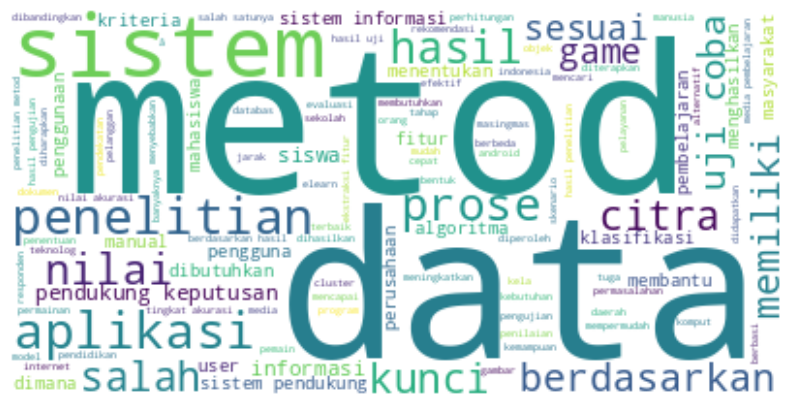

Proporsi Topic Dalam Dokumen:
                                               Abstrak   Topik 1   Topik 2  \
0    sistem informasi akademik siakad sistem inform...  0.218435  0.659562   
1    berjalannya koneksi jaringan komput lancar gan...  0.000950  0.998100   
2    web server perangkat lunak server berfungsi me...  0.000915  0.000915   
3    penjadwalan kuliah perguruan komplek permasala...  0.001486  0.997027   
4    seir perkembangan teknolog didunia muncul tekn...  0.043696  0.955103   
..                                                 ...       ...       ...   
853  investasi saham memiliki resiko kerugian perge...  0.000825  0.000825   
854  inform retriev ir pengambilan informasi tersim...  0.320092  0.001230   
855  klasifikasi citra prose pengelompokan piksel c...  0.998728  0.000636   
856  identifikasi atribut pejalan kaki salah peneli...  0.998453  0.000773   
857  topik deteksi objek menarik perhatian perkemba...  0.460848  0.467134   

      Topik 3  Total Proporsi Top

In [ ]:
import pandas as pd
import shutil
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

def main():
    print("Tugas 3 Latent Dirichlet Allocation (LDA)")
    print("Merupakan salah satu metode yang digunakan untuk mengelompokkan data ke dalam beberapa kelas.")

    file_path = '/content/drive/My Drive/UAS_PPW/tugas/HasilPreposPTA.xlsx'
    dt = pd.read_excel(file_path)

    print("Abstrak setelah di Preprocessing:")
    print(dt['cleaning'])

    print("Eksplorasi Analisis (Word Cloud):")
    long_string = ','.join(list(dt['cleaning'].astype(str).values))

    wordcloud = WordCloud(background_color="white", max_words=5000,
                          contour_width=3, contour_color='steelblue')
    wordcloud.generate(long_string)

    # Visualisasi WordCloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    # Replace this line with a relevant Matplotlib or Seaborn plot for wordcloud visualization

    print("Proporsi Topic Dalam Dokumen:")
    data = dt['cleaning']
    dt_lda = pd.DataFrame(data)

    dt_lda['cleaning'] = dt_lda['cleaning'].fillna('')

    vectorizer = CountVectorizer()
    count_matrix = vectorizer.fit_transform(dt_lda['cleaning'])

    # model LDA
    k = 3
    alpha = 0.1
    beta = 0.2

    lda = LatentDirichletAllocation(
        n_components=k, doc_topic_prior=alpha, topic_word_prior=beta, random_state=42)
    lda.fit(count_matrix)

    # distribusi topik pada setiap dokumen
    doc_topic_distribution = lda.transform(count_matrix)

    topic_names = [f"Topik {i+1}" for i in range(k)]
    df = pd.DataFrame(columns=['Abstrak'] + topic_names)

    for i, topic_name in enumerate(topic_names):
        df[topic_name] = doc_topic_distribution[:, i]

    # Menampilkan DataFrame
    df['Abstrak'] = dt_lda['cleaning'].values
    df['Total Proporsi Topik'] = df[topic_names].sum(axis=1)
    output_csv_file = "/content/drive/My Drive/UAS_PPW/tugas/topik_in_document.csv"
    df.to_csv(output_csv_file, index=False)

    print(df)

    print("Proporsi Kata Dalam Topik:")
    topic_word_distribution = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]

    word_topic_df = pd.DataFrame(topic_word_distribution.T, columns=[f"Topik {i+1}" for i in range(k)],
                                 index=vectorizer.get_feature_names_out())

    word_topic_df = word_topic_df.div(word_topic_df.sum(axis=1), axis=0)
    word_topic_df['Total Proporsi Kata'] = word_topic_df.sum(axis=1)
    drive_file_path = "/content/drive/My Drive/UAS_PPW/tugas/kata_in_topik.csv"
    shutil.move(output_csv_file, drive_file_path)

    print(word_topic_df)

if __name__ == "__main__":
    main()


# LDA Berdasarkan Label RPL dan Komputasi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Label,Jumlah
0,2,637
1,1,221


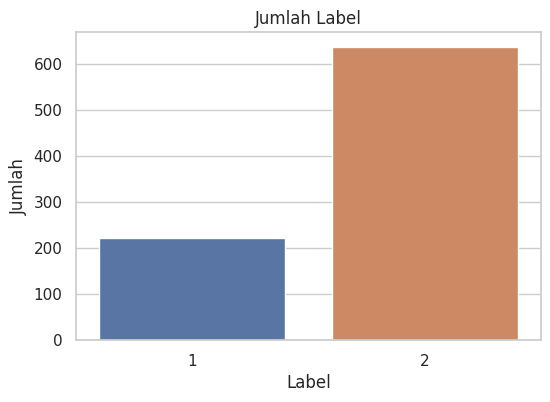

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import pickle
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Fungsi untuk menampilkan dataframe
from IPython.display import display

# Fungsi utama
def main():
    file_path = '/content/drive/My Drive/UAS_PPW/tugas/HasilPreposPTA.xlsx'
    dt = pd.read_excel(file_path)
    def get_label(Judul):
        if "RANCANG BANGUN" in str(Judul) or "SISTEM PENDUKUNG KEPUTUSAN" in str(Judul) or "IMPLEMENTASI" in str(Judul) or "APLIKASI" in str(Judul):
            return "RPL"
        else:
            return "Komputasi"
    df = pd.DataFrame(dt, columns=['Judul', 'cleaning', 'tokenized', 'stopwords_removed', 'stemmed'])

    # apply the function to the 'Judul' column and create a new 'Label' column
    df['Label'] = df['Judul'].apply(get_label)

    # create a dictionary to map the labels to numeric values
    label_map = {"RPL": 1, "Komputasi": 2}

    # apply the mapping to the 'Label' column
    df['Label'] = df['Label'].map(label_map)
    # display(df)
    file_path = '/content/drive/My Drive/UAS_PPW/tugas/Label.xlsx'
    df.to_excel(file_path, index=False)

    label_counts = df['Label'].value_counts().reset_index()
    label_counts.columns = ['Label', 'Jumlah']
    display(label_counts)

    sns.set(style="whitegrid")
    plt.figure(figsize=(6, 4))
    sns.countplot(x='Label', data=df)
    plt.title('Jumlah Label')
    plt.xlabel('Label')
    plt.ylabel('Jumlah')
    plt.show()

# Jalankan fungsi utama
if __name__ == "__main__":
    main()


# Menggunakan TF-IDF

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
file_path = '/content/drive/My Drive/UAS_PPW/tugas/Label.xlsx'
dt = pd.read_excel(file_path)

In [ ]:
dt['cleaning'].fillna('', inplace=True)
vectorizer = CountVectorizer()
count_matrix = vectorizer.fit_transform(dt['cleaning'])
count_array = count_matrix.toarray()
feature_names = vectorizer.get_feature_names_out()  # Nama fitur
df = pd.DataFrame(data=count_array, columns=feature_names)

# Baca data dari file Label.xlsx menggunakan path yang telah ditentukan sebelumnya
label_df = pd.read_excel(file_path)

# Gabungkan DataFrame df dan label_df berdasarkan indeks
df = pd.concat([df, label_df['Label']], axis=1)


In [ ]:
# Baca data dari file Label.xlsx
label_df = pd.read_excel("/content/drive/My Drive/UAS_PPW/tugas/Label.xlsx")

# Gabungkan DataFrame df dan label_df berdasarkan indeks
df = pd.concat([df, label_df['Label']], axis=1)

# Simpan DataFrame ke dalam file Excel
df.to_excel("/content/drive/My Drive/UAS_PPW/tugas/Label_with_Features.xlsx", index=False)
display(df)

,abad,abadi,abil,abjad,absensi,absolut,abstract,abstractpada,abstrak,abstraksemakin,...,zf,zona,zone,zoom,zâ,âµ,â¼,Label,Label,Label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,2
854,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,2
855,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,2
856,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,2


# Menggunakan KNN

In [ ]:
# Path menuju file "Label.xlsx" di Drive UAS_PPW/tugas
file_path = '/content/drive/My Drive/UAS_PPW/tugas/Label.xlsx'

# Load the data from "Label.xlsx" di path yang ditentukan
df = pd.read_excel(file_path)

# Lakukan operasi lain di sini
df['cleaning'].fillna('', inplace=True)

Test Predictions: [2 2 1 2 1 2 2 2 2 1 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2
 1 2 1 1 2 2 2 2 2 2 2 2 2 1 1 2 2 1 2 2 2 1 2 2 2 1 1 2 2 2 2 2 2 2 2 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 1 1 2 2 2 1 2 2 2 2 1 1 2 2 2 1 2 2
 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 1 2 2 2 1]
Classification Report:
{'1': {'precision': 0.36363636363636365, 'recall': 0.2608695652173913, 'f1-score': 0.3037974683544304, 'support': 46}, '2': {'precision': 0.7553956834532374, 'recall': 0.8333333333333334, 'f1-score': 0.7924528301886793, 'support': 126}, 'accuracy': 0.6802325581395349, 'macro avg': {'precision': 0.5595160235448005, 'recall': 0.5471014492753623, 'f1-score': 0.5481251492715549, 'support': 172}, 'weighted avg': {'precision': 0.6506228421068642, 'recall': 0.6802325581395349, 'f1-score': 0.6617659310934733, 'support': 172}}


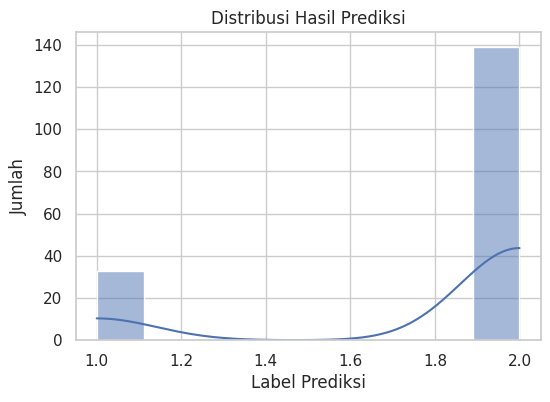

'Accuracy:'

0.6802325581395349

'Classification Report:'

'              precision    recall  f1-score   support\n\n           1       0.36      0.26      0.30        46\n           2       0.76      0.83      0.79       126\n\n    accuracy                           0.68       172\n   macro avg       0.56      0.55      0.55       172\nweighted avg       0.65      0.68      0.66       172\n'

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, classification_report

# Split the data into X and y
X = df['cleaning']
y = df['Label']

# Vectorize the text data
tfidfvectorizer = TfidfVectorizer()
tfidf_wm = tfidfvectorizer.fit_transform(X)

# Save the vectorizer for future use
with open('tfidf.pkl','wb') as f:
  pickle.dump(tfidfvectorizer,f)

# Reduce the dimensionality of the data using PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(tfidf_wm.toarray())

# Split the data into training and testing sets
training, test = train_test_split(X_pca,test_size=0.2, random_state=10)
training_label, test_label = train_test_split(y, test_size=0.2, random_state=10)

# Train the KNN model
modelKNN = KNeighborsClassifier(n_neighbors=3)
modelKNN.fit(training, training_label)

# Test the KNN model
test_pred = modelKNN.predict(test)
print("Test Predictions:", test_pred)

report = classification_report(test_label, test_pred, output_dict=True)
print("Classification Report:")
print(report)

# Misalnya, visualisasi hasil prediksi
plt.figure(figsize=(6, 4))
sns.histplot(test_pred, kde=True)
plt.title('Distribusi Hasil Prediksi')
plt.xlabel('Label Prediksi')
plt.ylabel('Jumlah')
plt.show()

# Test the KNN model
test_pred = modelKNN.predict(test)
accuracy = accuracy_score(test_label, test_pred)
report = classification_report(test_label, test_pred)

# Menggunakan display() untuk menampilkan hasil
display("Accuracy:", accuracy)
display("Classification Report:", report)
